# Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Get drivers data**

In [12]:
df = pd.read_csv('drivers.csv', delimiter='\t')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


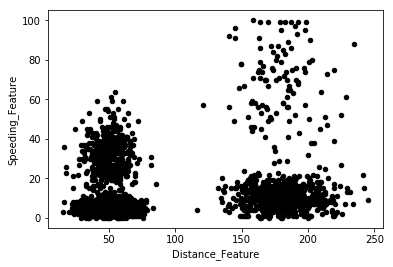

In [13]:
df.plot.scatter(x='Distance_Feature', y='Speeding_Feature', c='black')


### k-means

In [14]:
kmeans = KMeans(n_clusters=2).fit(df[['Distance_Feature', 'Speeding_Feature']])

In [15]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
df_2_labels = df
df_2_labels['Labels'] = kmeans.labels_

In [17]:
df_2_labels.head()

,Driver_ID,Distance_Feature,Speeding_Feature,Labels
0,3423311935,71.24,28.0,0
1,3423313212,52.53,25.0,0
2,3423313724,64.54,27.0,0
3,3423311373,55.69,22.0,0
4,3423310999,54.58,25.0,0


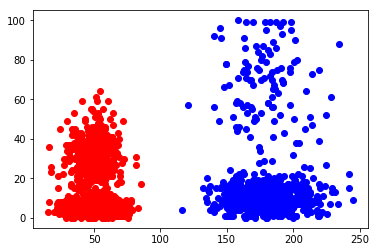

In [18]:
plt.plot(df_2_labels[df_2_labels['Labels'] == 0]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 0]['Speeding_Feature'], 'ro')
plt.plot(df_2_labels[df_2_labels['Labels'] == 1]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 1]['Speeding_Feature'], 'bo')

In [19]:
kmeans = KMeans(n_clusters=4).fit(df[['Distance_Feature', 'Speeding_Feature']])
df_2_labels['Labels'] = kmeans.labels_

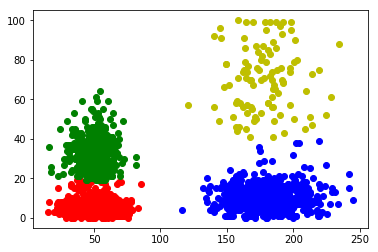

In [20]:
plt.plot(df_2_labels[df_2_labels['Labels'] == 0]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 0]['Speeding_Feature'], 'ro')
plt.plot(df_2_labels[df_2_labels['Labels'] == 1]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 1]['Speeding_Feature'], 'bo')
plt.plot(df_2_labels[df_2_labels['Labels'] == 2]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 2]['Speeding_Feature'], 'go')
plt.plot(df_2_labels[df_2_labels['Labels'] == 3]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 3]['Speeding_Feature'], 'yo')

### Elbow

In [23]:
losses = []

In [24]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(df[['Distance_Feature', 'Speeding_Feature']])
    losses.append(kmeans.inertia_)

In [25]:
losses

[12184626.129627977,
 1316420.8509477186,
 992634.060670247,
 719601.1096991899,
 534680.0090101319,
 372842.74100415467,
 319786.2310899318,
 276911.74122527934,
 252682.86936692797,
 230011.6963165219]

Text(0.5,1,'Elbow plot')

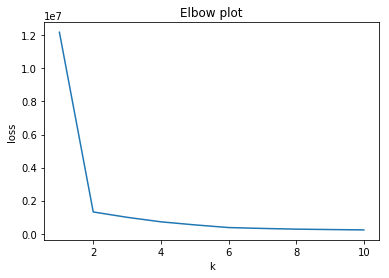

In [26]:
plt.plot(range(1, 11), losses)
plt.xlabel('k')
plt.ylabel('loss')
plt.title('Elbow plot')